In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao1"
CAND1_PATH = "data/paredao1/bianca.csv"
CAND2_PATH = "data/paredao1/chumbo.csv"

In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]

# Bianca

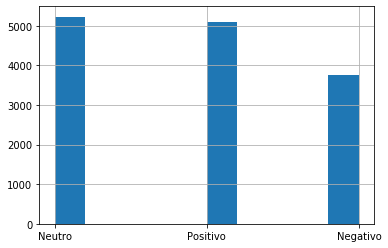

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,900,Neutro
1,Meus princesos,Positivo
2,ai que lindas ): ASSISTA ÁUDIO DE DESCULPAS,Positivo
3,Obgd,Neutro
4,"Obgdd, aproveita e me segue adm ❤️❤️",Positivo
...,...,...
14089,Ai gente tomara que o paredão não seja entre B...,Negativo
14090,Caraaaa se o paredão for entre : \nPyong× boca...,Neutro
14091,Petrix acha q tem liderança eterna né? Pancada...,Neutro
14092,Gente a globo tá msm ignorando oq o Petrix fe...,Negativo


# Chumbo (Eliminado)

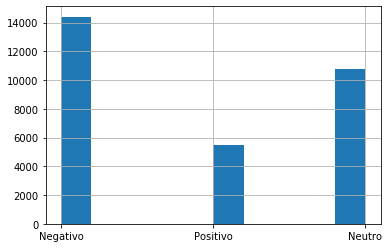

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,Só esperando o @lucaschumbo ser eliminado,Negativo
1,#ficachumbo vamos votar genteeee 🏄🏻‍♂️🏄🏻‍♂️🏄🏻‍...,Positivo
2,Menino tóxico,Neutro
3,@lucaschumbo pic.twitter.com/bhXdgK3e0v,Neutro
4,Eu tbm não queria,Neutro
...,...,...
30662,"Ahhh marcela e Gi falando de votar no chumbo, ...",Neutro
30663,"marcela vai votar no chumbo, essa mulher não e...",Negativo
30664,MARCELA E GI VÃO NO CHUMBO UFA #bbb20,Positivo
30665,Marcela está falando sobre votos com Gizelly e...,Neutro


# Quantidades absolutas

In [9]:
candidates = {"bianca_andrade": cand1, "lucas_chumbo": cand2}

In [10]:
qtds_df = get_raw_quantities(candidates)

In [11]:
qtds_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,5102,5230,3762
lucas_chumbo,5460,10796,14411


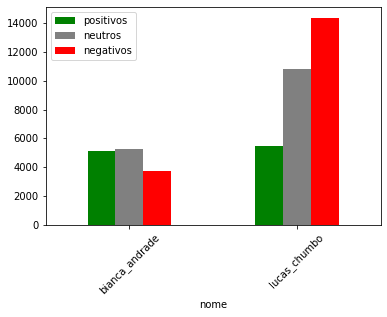

In [12]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [13]:
pcts_df = get_pct_by_candidate(candidates)

In [14]:
pcts_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,0.361998,0.37108,0.266922
lucas_chumbo,0.178042,0.35204,0.469919


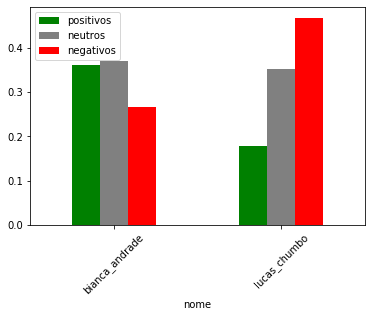

In [15]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [16]:
qtds_df_copy = qtds_df.copy()

In [17]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [18]:
qtds_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,0.483052,0.326345,0.20701
lucas_chumbo,0.516948,0.673655,0.79299


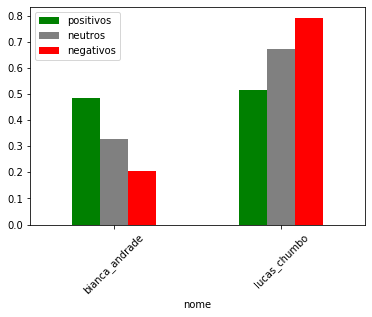

In [19]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [20]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [21]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [22]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [23]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [24]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [25]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,407828,0.2446
lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,11665,0.7594


In [ ]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))